In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # comment this line if you don't want to use seaborn for plots

import numpy as np
from scipy import stats

# add the path to the abcTau package
import sys
#sys.path.append('./abcTau')
sys.path.append('C:\\Users\\ipochino\\.conda\\envs\\isttc\\Lib\\site-packages\\abcTau') # IP: replaced previous line with that; relative path was not working
import abcTau


# graphical properties for figures
sns.set_context('talk',font_scale= 1.5)
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8" 
plt.rcParams.update({'font.size': 12})

In [5]:
abc_tau_folder = 'D:\\intr_timescales\\abcTau-master\\'

### Step 1: Extracting required statistics from real data

In [6]:
#---------- load real data  (OU process with one timescale)
dataload_path = abc_tau_folder + 'example_data/'
filename = 'OU_tau100_T1000_fs1000_trials500'
data_load = np.load(dataload_path + filename + '.npy')

#---------- extract statistics from real data
# select summary statistics metric
summStat_metric = 'comp_ac_fft'
ifNorm = True # if normalize the autocorrelation or PSD
deltaT = 1 # temporal resolution of data.
binSize = 1 #  bin-size for binning data and computing the autocorrelation.
disp = None # put the dispersion parameter if computed with grid-search
maxTimeLag = 500 # only used when using autocorrelation for summary statistics
lm = round(maxTimeLag/binSize) # maximum bin for autocorrelation computation
data_ac, data_mean, data_var, T, numTrials = abcTau.preprocessing.extract_stats(data_load, deltaT, binSize,\
                                                                                  summStat_metric, ifNorm, maxTimeLag)

### Step 2 (optional): Check the bias in timescales estimated from exponential fits (preprocessing module using parametric bootstrapping)

44% bootstrap-error
The true error from the ground truth can be larger


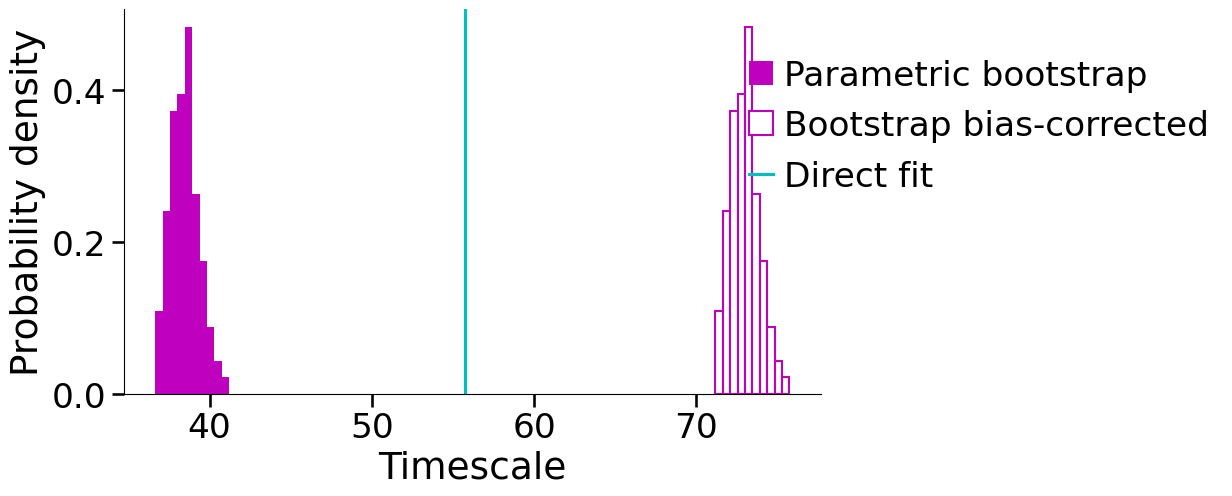

In [9]:
gt_tau = 100 # ground-truth timescale

# fit 
popt, poptcov = abcTau.preprocessing.fit_oneTauExponential(data_ac, binSize, maxTimeLag)
tau = popt[1]

# check if estimated timescales with exponential fit are biased or not
theta = np.array([tau])
numTimescales = 1
taus_bs, taus_bs_corr, err = abcTau.preprocessing.check_expEstimates(theta, deltaT, binSize, T, numTrials,\
                                                                     data_mean, data_var, maxTimeLag, numTimescales,\
                                                                     numIter = 100, plot_it = True)